In [1]:
# Simple example of tf.GradientTape in action

In [3]:
import tensorflow as tf
import numpy as np

2025-04-06 15:49:17.432239: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
np.random.seed(42)
tf.random.set_seed(42)

In [5]:
X = np.random.rand(100, 1)
X.shape

(100, 1)

In [6]:
y_true = 3 * X + 2


In [7]:
X = tf.constant(X, dtype=tf.float32)
X.shape

TensorShape([100, 1])

In [8]:
y_true = tf.constant(y_true, dtype=tf.float32)

In [9]:
W = tf.Variable(tf.random.normal(shape=(1, 1)))
print(W)

<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[0.3274685]], dtype=float32)>


In [10]:
b = tf.Variable(tf.zeros(1))
print(b)

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [11]:
optimizer = tf.optimizers.Adam(learning_rate=0.1)

In [12]:
for step in range(200):
    with tf.GradientTape() as tape:
        y_pred = tf.matmul(X, W) + b
        loss = tf.reduce_mean(tf.square(y_pred - y_true))
        gradients = tape.gradient(loss, [W, b])
        optimizer.apply_gradients(zip(gradients, [W, b]))

        if step % 20 == 0:
            print(f"Step {step}: Loss = {loss.numpy():.4f}, W = {W.numpy()}, b = {b.numpy()}")

Step 0: Loss = 11.2310, W = [[0.42746776]], b = [0.09999929]
Step 20: Loss = 0.4125, W = [[2.2153637]], b = [1.879383]
Step 40: Loss = 0.1468, W = [[2.8495843]], b = [2.4474006]
Step 60: Loss = 0.0098, W = [[2.6774971]], b = [2.1689186]
Step 80: Loss = 0.0084, W = [[2.7148945]], b = [2.1078784]
Step 100: Loss = 0.0040, W = [[2.8120377]], b = [2.1171293]
Step 120: Loss = 0.0021, W = [[2.848357]], b = [2.0762577]
Step 140: Loss = 0.0011, W = [[2.8920624]], b = [2.0572128]
Step 160: Loss = 0.0005, W = [[2.9243658]], b = [2.040272]
Step 180: Loss = 0.0003, W = [[2.9483068]], b = [2.0271266]


In [13]:
# Chapter 3 exercises

In [14]:
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [15]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [16]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[ 0.08422458]
 [-0.86090374]
 [ 0.37812304]], shape=(3, 1), dtype=float32)


In [17]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.7413678 ]
 [0.62854624]
 [0.01738465]], shape=(3, 1), dtype=float32)


In [18]:
x = np.ones(shape=(2, 2))
print(x)

[[1. 1.]
 [1. 1.]]


In [19]:
x[0, 0] = 0.

In [20]:
x = tf.ones(shape=(2, 2))
print(x)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


In [22]:
x[0, 0] = 0. # this will raise an error -- tf tensors are immutable

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [24]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.00924649],
       [-0.66206276],
       [-0.7410269 ]], dtype=float32)>


In [25]:
v.assign(tf.ones((3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>


In [26]:
v[0, 0].assign(3.)
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>


In [27]:
v.assign_add(tf.ones((3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>


In [31]:
a = tf.ones((2, 2))
print(a)
b = tf.square(a)
print(b)
c = tf.sqrt(a)
print(c)
d = b + c
print(d)
e = tf.matmul(a, b)
print(e)
e += d
print(e)


tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


In [38]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result=tf.square(input_var)
gradient = tape.gradient(result, input_var)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [39]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
print(gradient)


tf.Tensor(6.0, shape=(), dtype=float32)


In [40]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
print(acceleration)
print(speed)

tf.Tensor(9.8, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)


In [41]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)


In [46]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
inputs.shape

(2000, 2)

In [50]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"), np.ones((num_samples_per_class, 1), dtype="float32")))
print(targets.shape)
print(targets)

(2000, 1)
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


In [51]:
import matplotlib.pyplot as plt

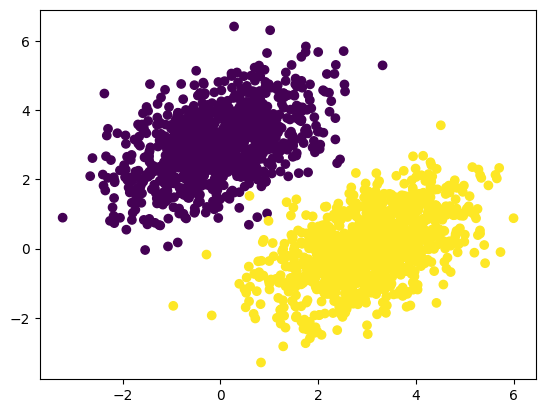

In [52]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [56]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))
print(W)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.2046014 ],
       [0.82478166]], dtype=float32)>
